<a href="https://colab.research.google.com/github/Entspannter/CrispCerebella/blob/main/Code/train_CNNLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/Entspannter/CrispCerebella/blob/main/Test_File.ipynb)

SyntaxError: ignored

In [1]:
!git clone https://github.com/Entspannter/CrispCerebella.git

Cloning into 'CrispCerebella'...
remote: Enumerating objects: 577, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 577 (delta 0), reused 0 (delta 0), pack-reused 573
Receiving objects: 100% (577/577), 226.72 MiB | 30.17 MiB/s, done.
Resolving deltas: 100% (301/301), done.
Checking out files: 100% (210/210), done.


In [2]:
pip install -q -U keras-tuner

     |████████████████████████████████| 96 kB 5.8 MB/s 


In [3]:
import tensorflow as tf
import os
import numpy as np
import random 

SEED = 42

In [4]:
# Import own functions and model-classes
from CrispCerebella.Code.train_functions import *
from CrispCerebella.Code.data_loading import *
from CrispCerebella.Code.architecture import *


In [5]:
# Call the above function with seed value
set_global_determinism(seed=SEED)

In [6]:
import random as python_random
# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(SEED)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(SEED)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(SEED)

In [7]:
import os 
import numpy as np
from google.colab import files
from tensorflow.keras.utils import to_categorical
import keras_tuner

In [8]:
# load all train
trainX, trainy = datasetloader('train', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')
print("Shape of training Data:",trainX.shape, trainy.shape)
# load all test
testX, testy = datasetloader('test', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')
print("Shape of test Data:",testX.shape, testy.shape)

Shape of training Data: (7352, 128, 9) (7352, 1)
Shape of test Data: (2947, 128, 9) (2947, 1)


In [9]:
# transform the output date into categorical (one-hot-encoding) and print the updated shapes
trainX, trainy, testX, testy = transform_dataset(trainX, trainy, testX, testy)

n_timesteps, n_features, N_OUTPUTS = trainX.shape[1], trainX.shape[2], trainy.shape[1]

n_steps, n_length = 4, 32

#reshape the X data
trainX = trainX.reshape((trainX.shape[0], n_steps, n_length, n_features))
testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features))
 
# define the inout share for the CNNLSTM model
INPUT_SHAPE=(None, n_timesteps,n_features)

# define input variable for the k-fold CV and the model estimation functions
Num_Epochs_Search = 40
Num_Epochs_Fit = 40
Max_Trials = 10
Num_K_Folds = 5
Model_Name_CNNLSTM = "CNNLSTM"
batch_size = 64

# merge the train and test data to recreate the initial dataset for later
# splitting in the k-fold process
X_CNNLSTM = np.concatenate((trainX, testX),axis=0)
y_CNNLSTM = np.concatenate((trainy, testy),axis=0)


(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)


In [10]:
# Hyperparameters tuning inside of k-fold CV
Best_HP_CNNLSTM, Best_Epoch_CNNLSTM= k_fold_cv(X_CNNLSTM,
                                                              y_CNNLSTM,
                                                              CNNLSTM,
                                                              Model_Name_CNNLSTM,
                                                              INPUT_SHAPE,
                                                              N_OUTPUTS,
                                                              Max_Trials,
                                                              Num_Epochs_Search,
                                                              Num_Epochs_Fit,
                                                              Num_K_Folds)


Trial 10 Complete [00h 00m 18s]
val_accuracy: 0.8798543810844421

Best val_accuracy So Far: 0.9095873832702637
Total elapsed time: 00h 03m 51s
INFO:tensorflow:Oracle triggered exit
Epoch 1/40
206/206 [==============================] - 4s 10ms/step - loss: 0.5867 - accuracy: 0.7515 - val_loss: 0.5005 - val_accuracy: 0.7907
Epoch 2/40
206/206 [==============================] - 1s 6ms/step - loss: 0.3192 - accuracy: 0.8909 - val_loss: 0.3490 - val_accuracy: 0.8689
Epoch 3/40
206/206 [==============================] - 1s 6ms/step - loss: 0.2276 - accuracy: 0.9205 - val_loss: 0.3980 - val_accuracy: 0.8337
Epoch 4/40
206/206 [==============================] - 1s 6ms/step - loss: 0.1873 - accuracy: 0.9279 - val_loss: 0.3501 - val_accuracy: 0.8538
Epoch 5/40
206/206 [==============================] - 1s 6ms/step - loss: 0.1602 - accuracy: 0.9427 - val_loss: 0.4329 - val_accuracy: 0.8532
Epoch 6/40
206/206 [==============================] - 1s 6ms/step - loss: 0.2015 - accuracy: 0.9273 - val_lo

In [11]:
# Print the hyperparameters that yielded the best model all over the k-folds
Best_HP_CNNLSTM.get_config()['values']

{'dense_activation': 'tanh',
 'dropout_1': 0.35000000000000003,
 'dropout_2': 0.35000000000000003,
 'learning_rate': 0.0051059346908493425,
 'num_filters_1': 32,
 'num_filters_2': 16,
 'units': 224,
 'units_LSTM': 512}

Epoch 1/27
184/184 [==============================] - 4s 9ms/step - loss: 0.4726 - accuracy: 0.8029 - val_loss: 0.3225 - val_accuracy: 0.8946
Epoch 2/27
184/184 [==============================] - 1s 6ms/step - loss: 0.1908 - accuracy: 0.9315 - val_loss: 0.3262 - val_accuracy: 0.9069
Epoch 3/27
184/184 [==============================] - 1s 6ms/step - loss: 0.1338 - accuracy: 0.9444 - val_loss: 0.2158 - val_accuracy: 0.9307
Epoch 4/27
184/184 [==============================] - 1s 6ms/step - loss: 0.1384 - accuracy: 0.9480 - val_loss: 0.2275 - val_accuracy: 0.9225
Epoch 5/27
184/184 [==============================] - 1s 6ms/step - loss: 0.1270 - accuracy: 0.9476 - val_loss: 0.4122 - val_accuracy: 0.8817
Epoch 6/27
184/184 [==============================] - 1s 6ms/step - loss: 0.1226 - accuracy: 0.9502 - val_loss: 0.2395 - val_accuracy: 0.9313
Epoch 7/27
184/184 [==============================] - 1s 6ms/step - loss: 0.1097 - accuracy: 0.9532 - val_loss: 0.2372 - val_accuracy: 0.9123
Epoch 

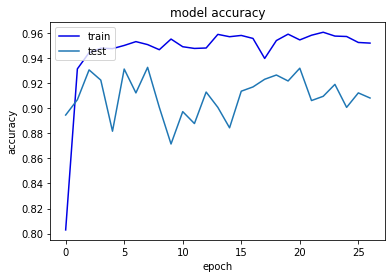

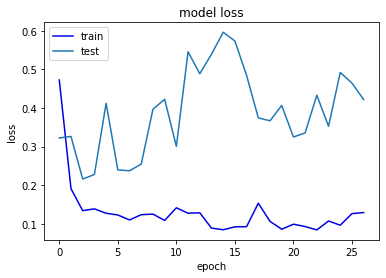

The accuracy of the model is 0.91923987865448


In [12]:
# Build a new model with the HP, train it with the inital training set and eveluate it with the test set 

BestModelCNNLSTM, CNNLSTM_accuracy = evaluate_model(trainX,
                               trainy,
                               testX,
                               testy,
                               INPUT_SHAPE,
                               N_OUTPUTS,
                               Best_HP_CNNLSTM,
                               CNNLSTM,
                               Best_Epoch_CNNLSTM,
                               batch_size)


In [13]:
# create a unique file name by attaching the first four accuracy digits

file_name_ending = str(int(CNNLSTM_accuracy * 10000))

In [14]:
# save the model by using the unique file name (model name + accuracy)
BestModelCNNLSTM.save("/content/CrispCerebella/Models/Final_Model_CNNLSTM_" + file_name_ending)

INFO:tensorflow:Assets written to: /content/CrispCerebella/Models/Final_Model_CNNLSTM_9192/assets


INFO:tensorflow:Assets written to: /content/CrispCerebella/Models/Final_Model_CNNLSTM_9192/assets


In [15]:
# create a zip file out of the saved model

!zip -r /content/CrispCerebella/Models/Final_Model_CNNLSTM_{file_name_ending}.zip /content/CrispCerebella/Models/Final_Model_CNNLSTM_{file_name_ending}

  adding: content/CrispCerebella/Models/Final_Model_CNNLSTM_9192/ (stored 0%)
  adding: content/CrispCerebella/Models/Final_Model_CNNLSTM_9192/variables/ (stored 0%)
  adding: content/CrispCerebella/Models/Final_Model_CNNLSTM_9192/variables/variables.index (deflated 66%)
  adding: content/CrispCerebella/Models/Final_Model_CNNLSTM_9192/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/CrispCerebella/Models/Final_Model_CNNLSTM_9192/assets/ (stored 0%)
  adding: content/CrispCerebella/Models/Final_Model_CNNLSTM_9192/keras_metadata.pb (deflated 84%)
  adding: content/CrispCerebella/Models/Final_Model_CNNLSTM_9192/saved_model.pb (deflated 89%)


In [16]:
# downloading the zip file (to store it locally and be able to push it to git)

files.download(f"/content/CrispCerebella/Models/Final_Model_CNNLSTM_{file_name_ending}.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
# unzip the folder of the model with a given accuracy
# !unzip /content/CrispCerebella/Models/Final_Model_CNNLSTM_{file_name_ending}.zip -d /Test

In [18]:
# load the saved model
# test_model = keras.models.load_model(f'/content/CrispCerebella/Test/content/CrispCerebella/Models/Final_Model_CNNLSTM_{file_name_ending}')

In [19]:
# evaluate the saved model
# test_model.evaluate(testX, testy)